# Clustering

In [1]:
import numpy as np
import pandas as pd

In [14]:
samples = pd.read_csv('seeds.csv', header=None)
samples = samples.iloc[:,range(0,7)]

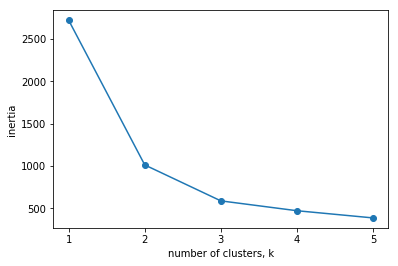

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

ks = range(1, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [57]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

samples = pd.read_csv('fish.csv', header=None)
samples.columns = ['species', 'weight', 'length1', 'length2', 'length3', 'height', 'width']
species = samples['species']
samples = samples.drop('species',axis=1)

# Create pipeline
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(samples)

# Calculate the cluster labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns
df = pd.DataFrame({'labels': labels, 'species': species})
# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0            1     0     19      1
1           33     0      1      0
2            0    17      0      0
3            0     0      0     13


In [99]:
from sklearn.preprocessing import Normalizer

movements = pd.read_csv('stocks.csv')
companies = movements.iloc[:,0].values.tolist()
movements = np.array(movements.drop(movements.columns[[0]], axis=1))

normalizer = Normalizer()
kmeans = KMeans()
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels').head())

    labels         companies
29       0   Lookheed Martin
4        0            Boeing
36       0  Northrop Grumman
31       1         McDonalds
35       1          Navistar


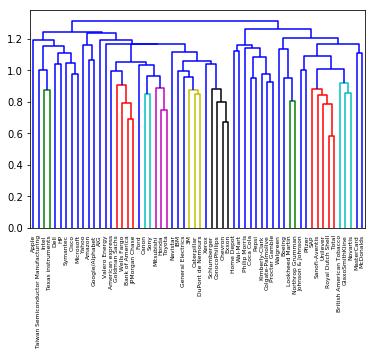

In [100]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram

# Normalize the movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method="complete")

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()